# ニューラルネットワークの学習理論(損失編)


## 損失関数(loss function)
ニューラルネットワークの学習では、的確な推論を行うために最適な各パラメータ（重みやバイアス）を決定する。
このとき、最適なパラメータに近づくための指標となるのが「**損失関数（loss function）**」。

「正解値」と「ニューラルネットの出力」の**誤差**を「**損失**」という。

### データを用意
「正解データ」と「出力」のArrayを用意する

In [ ]:
import numpy as np

#正解データ (one-hot表現)
t = np.array([0, 0, 0, 1, 0])
#ニューラルネットワークの出力　(y1: 正解, y2: 不正解)
y1 = np.array([0.1, 0.05, 0.0, 0.7, 0.15])
y2 = np.array([0.5, 0.2, 0.0, 0.1, 0.2 ])

### 2乗和誤差(sum of squared error)

誤差 = $\frac{1}{2} \displaystyle \sum_{k}(y_{k}-t_{k})^2$ 

出力 $y_{k}$ と正解データ $t_{k}$ の差の２乗の総和を求める

総和が小さければ小さいほど、出力と正解の誤差が少ないということになる。

In [13]:
#２乗和誤差（sum of squared error）の実装
def sum_squared_error(y, t):
    return 0.5 * np.sum((y - t) ** 2)

#２乗和誤差による損失関数の計算
y1_loss = sum_squared_error(y1, t)
y2_loss = sum_squared_error(y2, t)

print('２乗和誤差による損失関数の計算結果:')
print('y1(出力が正解の場合) : {:.4f}'.format(y1_loss))
print('y2(出力が不正解の場合) : {:.3f}'.format(y2_loss))

２乗和誤差による損失関数の計算結果
y1(出力が正解の場合) : 0.0625
y2(出力が不正解の場合) : 0.570


### 交差エントロピー誤差

$E = - \displaystyle \sum_{k} t_k log y_k$

$E$ : 誤差

出力 $y_{k}$

正解データ $t_{k}$ 

データの次元数 $k$

各要素における「出力の自然対数$log_y$」と「正解データ$t$」との積を計算する。

In [15]:
#交差エントロピー誤差（cross entropy error）の実装
#log(0)の場合に負の無限大に発散することを防ぐため、微小値deltaを導入している
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

#交差エントロピー誤差による損失関数の計算
y1_loss = cross_entropy_error(y1, t)
y2_loss = cross_entropy_error(y2, t)

print('交差エントロピー誤差による損失関数の計算結果')
print('y1(出力が正解の場合) : {:.4f}'.format(y1_loss))
print('y2(出力が不正解の場合) : {:.3f}'.format(y2_loss))

交差エントロピー誤差による損失関数の計算結果
y1(出力が正解の場合) : 0.3567
y2(出力が不正解の場合) : 2.303


## $-logy$ のグラフ

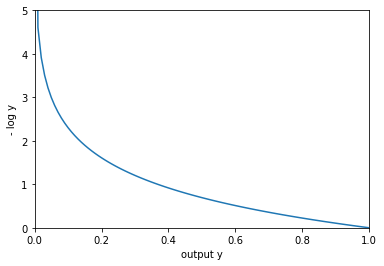

In [16]:
import matplotlib.pyplot as plt
y = np.arange(0, 1.01, 0.01)
delta = 1e-7
loss = -np.log(y + delta)
plt.plot(y, loss)
plt.xlim(0, 1)
plt.xlabel('output y')
plt.ylim(0, 5)
plt.ylabel('- log y')
plt.show()

## 勾配降下法

勾配法（勾配降下法）
勾配法には以下の２種類があります。

最小値を求めるのが勾配降下法

最大値を求めるのが勾配上昇法

機械学習では基本的には、損失関数を最小化するように重みを更新するため勾配降下法が利用されます。

重みの更新は、入力〜出力→損失関数の一連の数式に対して、微分を行い、重み移動を少しずつ繰り返すことで、損失関数を最小化させていきます。

### ミニバッチ
訓練データの中からランダムにデータを抜き出して学習をさせることをミニバッチといいます。
ミニバッチを利用するということは、一部のデータを全体の近似として利用することになります。

### ミニバッチにおける損失関数の計算について
損失関数の計算は抜き出した訓練データ１つ１つに対して求める必要はなく、
最終的な損失の値を訓練データの数で割ることで平均の損失値を求める形になります。
なぜなら、最終的な目的は、全ての訓練データで、損失の値を0にすることのため、全体として損失最小化をすれば良いため、平均を求める形となります。


## 最急降下法

## 確率的勾配降下法(SGD, stochastic gradient descent)


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation as ani

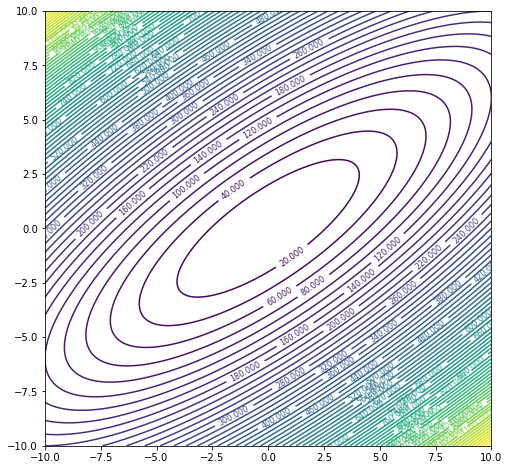

In [3]:
# グラフの範囲を指定
x_low  = -10
x_high = 10
y_low  = -10
y_high = 10

# 格子状に分割した各座標を作成
X = np.linspace(x_low, x_high, 1000)
Y = np.linspace(y_low, y_high, 1000)
X, Y = np.meshgrid(X, Y)

# 関数に従い曲面を作成
Z = (3 * X ** 2) + (5 * Y ** 2) - (6 * X * Y)

# 曲面の描画
plt.figure(figsize=(8, 8))
interval = np.arange(np.min(Z), np.max(Z), 20)
counter_plane = plt.contour(X, Y, Z, interval)
plt.clabel(counter_plane, inline=1, fontsize=8)
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.show()
plt.close()

## 勾配の計算
目的関数の勾配を計算する関数を定義

In [4]:
def get_grad_vec(x, y):
    grad_x = 6 * x - 6 * y
    grad_y = 10 * y - 6 * x
    return [grad_x, grad_y]

In [6]:
# 初期値の設定
init_x = 2.5
init_y = 7.5

# 学習率・終了条件の設定
lr = 0.05
epsilon = 0.001

list_xs   = []
list_ys   = []
list_nxs  = []
list_nys  = []
list_diff = []

xs = init_x
ys = init_y
step = 0

for i in range(100):

    grad_vec = get_grad_vec(xs, ys)
    n_xs = xs - lr * grad_vec[0]
    n_ys = ys - lr * grad_vec[1]

    list_xs.append(xs)
    list_ys.append(ys)
    list_nxs.append(n_xs)
    list_nys.append(n_ys)

    # judge convergence
    diff = np.sqrt(grad_vec[0]**2 + grad_vec[1]**2)
    list_diff.append(diff)
    
    # 終了判定
    step += 1
    if diff < epsilon:       
        break

    xs = n_xs
    ys = n_ys
    print(step, ":", diff)

1 : 67.08203932499369
2 : 21.213203435596427
3 : 10.478549517943787
4 : 8.402142583888947
5 : 7.584579091815181
6 : 6.939126976788941
7 : 6.356934619767614
8 : 5.824322112905503
9 : 5.336398792098806
10 : 4.889356142171138
11 : 4.4797638025201385
12 : 4.104483976418354
13 : 3.7606421839572075
14 : 3.445604786959892
15 : 3.1569587765300295
16 : 2.8924932872270808
17 : 2.650182662774745
18 : 2.4281709406506566
19 : 2.2247576364593544
20 : 2.0383847191820554
21 : 1.8676246775390346
22 : 1.7111695860595064
23 : 1.5678210871112592
24 : 1.4364812121580395
25 : 1.3161439719407193
26 : 1.2058876511677736
27 : 1.1048677486967409
28 : 1.0123105091324685
29 : 0.9275069962978086
30 : 0.8498076631829291
31 : 0.7786173767820843
32 : 0.71339085971094
33 : 0.6536285136897858
34 : 0.5988725929028987
35 : 0.5487036979241342
36 : 0.5027375633542073
37 : 0.46062211456477375
38 : 0.42203477100563463
39 : 0.38667997541992044
40 : 0.3542869300424394
41 : 0.3246075224417481
42 : 0.29741442511906335
43 : 0.272

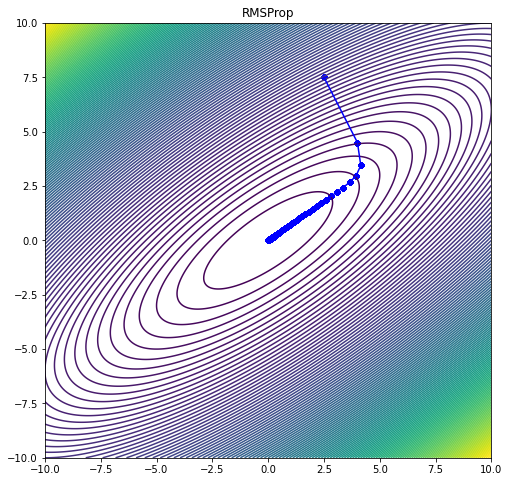

In [12]:
def plot(xs, ys, nxs, nys, txt):
  plt.figure(figsize=(8, 8))
  plt.title(txt)
  interval = np.arange(np.min(Z), np.max(Z), 10.)
  plt.contour(X, Y, Z, interval)
  for i in range(len(xs) - 1):
    plt.plot([xs[i-1], nxs[i-1]], [ys[i-1], nys[i-1]], c='b')
    plt.scatter(xs, ys, s=20, c="b")
  
  plt.xlim(-10, 10)
  plt.ylim(-10, 10)
  plt.show()
  plt.close()

# 結果の描画
plot(list_xs, list_ys, list_nxs, list_nys, 'RMSProp')